<center>
<img src="https://laelgelcpublic.s3.sa-east-1.amazonaws.com/lael_50_years_narrow_white.png.no_years.400px_96dpi.png" width="300" alt="LAEL 50 years logo">
<h3>APPLIED LINGUISTICS GRADUATE PROGRAMME (LAEL)</h3>
</center>
<hr>

# Corpus Linguistics - Study 1 - Phase 2 - Sara

The purpose of this document is to extract a sample of 1000 texts from the [4000 stories with sentiment analysis dataset](https://brunel.figshare.com/articles/dataset/4000_stories_with_sentiment_analysis_dataset/7712540?file=14357549) balanced across `author` and considering the following approach:

- Consider excluding short texts such as fables
- Consider texts that are closer to the median, in the interquartile range
- Select as many authors as possible and as many stories per author per author as possible in such a way that results in a sample of 1000 stories

## What is the `4000 stories with sentiment analysis dataset`?

This dataset presents 4,000 short stories that have been classified in terms of their emotional content and semantic structure. Emotional content was calculated using the valence, arousal and dominance norms in Warriner et al. (2014). Semantic structure was derived using the doc2vec algorithm, which classifies each text as a 300-place vector. The authors created this dataset as part of a study of the impact of narrative literature on mental health.

## Required Python packages

- pandas
- numpy
- seaborn
- matplotlib

## Importing the required libraries

In [1]:
import pandas as pd
import os
import sys
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Define input variables

In [2]:
input_directory = 'cl_st1_ph1_sara'
output_directory = 'cl_st1_ph2_sara'
id = 'short_stories'
dataset_filename_1 = f"{id}_full"
dataset_filename_2 = f"{id}_per_author"
dataset_filename_3 = f"{id}_sample"
dataset_filename_4 = f"{id}_iqr"

## Create output directory

In [3]:
# Check if the output directory already exists. If it does, do nothing. If it doesn't exist, create it.
if os.path.exists(output_directory):
    print('Output directory already exists.')
else:
    try:
        os.makedirs(output_directory)
        print('Output directory successfully created.')
    except OSError as e:
        print('Failed to create the directory:', e)
        sys.exit(1)

Output directory already exists.


## Import the data into a DataFrame

In [4]:
df_short_stories_2 = pd.read_json(f"{input_directory}/{dataset_filename_1}.jsonl", lines=True)

In [5]:
display(df_short_stories_2)

,Unnamed: 0,url,length,title,text_no,author,story,valence,arousal,dominance,...,290,291,292,293,294,295,296,297,298,299
0,0,https://americanliterature.com/author/eleanor-...,15044,"Peace on Earth, Good-Will to Dogs",0,Eleanor Hallowell Abbott,"PART I\n\nIf you don't like Christmas stories,...",0.592896,0.397839,0.569567,...,3.793141,3.837345,3.778353,-0.815515,-0.720440,-10.738245,-8.765683,0.875089,-10.176691,1.736791
1,1,https://americanliterature.com/author/eleanor-...,10874,The Indiscreet Letter,1,Eleanor Hallowell Abbott,The Railroad Journey was very long and slow. T...,0.593563,0.381156,0.574662,...,-0.309515,3.147870,0.635545,-0.334742,-0.751833,-3.957765,-0.385042,-6.485331,-4.579382,-1.580983
2,2,https://americanliterature.com/author/achmed-a...,6922,An Act of Piety,2,Achmed Abdullah,His affair that night was prosy. He was intend...,0.583742,0.395598,0.566515,...,-9.559562,-1.365196,3.256023,-3.436836,-0.721138,-7.386739,-3.685618,-2.188498,2.970203,3.309226
3,3,https://americanliterature.com/author/achmed-a...,4371,An Indian Jataka,3,Achmed Abdullah,"This is the tale which Jehan Tugluk Khan, a wi...",0.605795,0.404819,0.569258,...,-6.402253,-4.087686,-3.714201,-0.967430,-1.042184,1.208730,6.321670,-4.462947,-4.534634,4.136161
4,4,https://americanliterature.com/author/achmed-a...,3413,Fear,4,Achmed Abdullah,THE fact that the man whom he feared had died ...,0.545548,0.404478,0.546212,...,-0.637324,0.034142,-3.545210,2.767453,0.447380,0.102913,0.755849,-10.680321,-0.472589,-0.216070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4066,4066,https://americanliterature.com/author/emile-zo...,11547,Captain Burle,4072,Emile Zola,CHAPTER I - THE SWINDLE\n\nIt was nine o'clock...,0.558770,0.384706,0.561165,...,2.036475,-1.852210,-2.878432,0.820373,3.333893,1.376029,0.792268,1.079375,-5.319479,-1.326987
4067,4067,https://americanliterature.com/author/emile-zo...,10599,Death of Olivier Becaille,4073,Emile Zola,CHAPTER I - MY PASSING\n\nIt was on a Saturday...,0.553442,0.389239,0.553421,...,-0.221173,-0.417936,-2.129282,0.104781,1.509659,-5.708700,-6.268070,1.555758,-5.677875,3.252067
4068,4068,https://americanliterature.com/author/emile-zo...,16034,Jean Gourdon's Four Days,4074,Emile Zola,"SPRING\n\nOn that particular day, at about fiv...",0.584542,0.387704,0.560985,...,1.309036,-2.229325,-7.380815,8.966954,-0.632408,0.345373,-1.436483,1.364127,-2.963004,-2.288732
4069,4069,https://americanliterature.com/author/emile-zo...,10821,The Fete At Coqueville,4075,Emile Zola,I\n\nCoqueville is a little village planted in...,0.585265,0.388346,0.565073,...,5.175362,0.435068,-6.252507,-1.211361,2.597182,-0.668774,-0.190237,-0.377501,-1.255515,-2.412473


## Descriptive statistics for `word_count_nltk` in `df_short_stories_2`

Descriptive statistics for word_count_nltk:
- Count: 4071
- Mean: 3440.73
- Std (sample): 1870.19
- Min: 20
- Q1 (25%): 1878.00
- Median (50%): 3394.00
- Q3 (75%): 5431.00
- Max: 6539

IQR outlier thresholds:
- Lower fence: -3451.50
- Upper fence: 10760.50
Outliers found: 0


,author,title,word_count_nltk


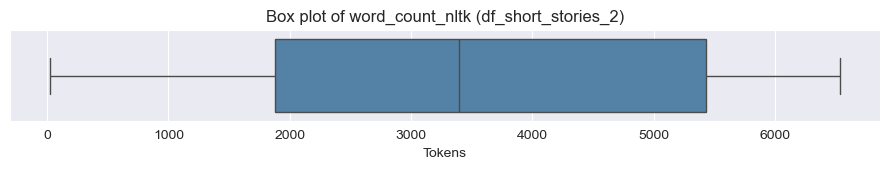

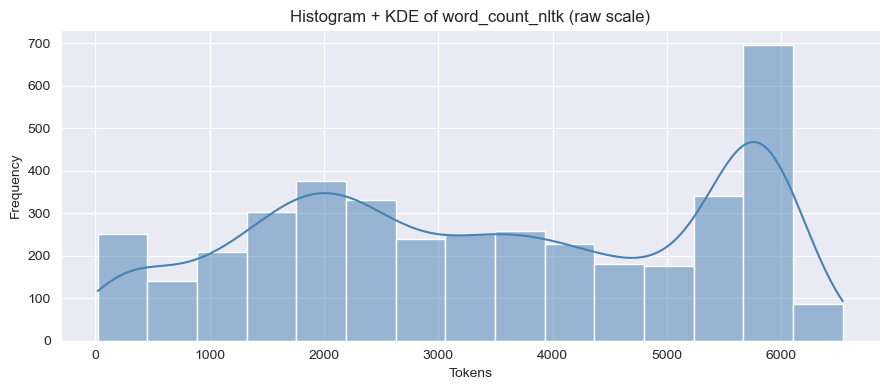

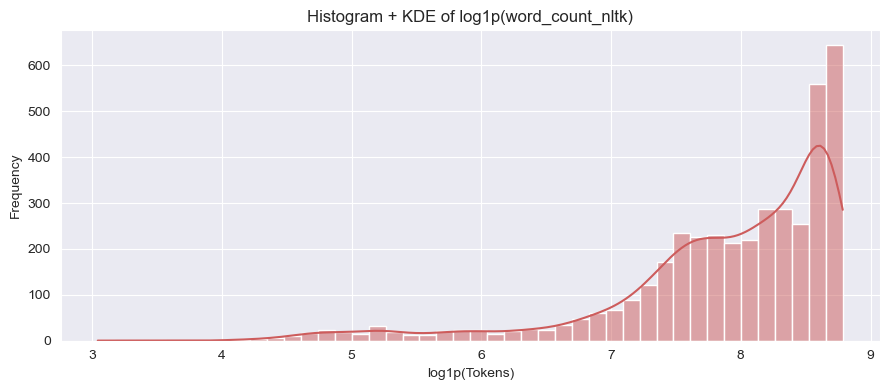

In [6]:
# Select the series
series = df_short_stories_2['word_count_nltk'].dropna()

# Summary stats
mean_val = series.mean()
std_val = series.std(ddof=1)  # sample standard deviation
desc = series.describe()  # count, mean, std, min, 25%, 50%, 75%, max

print("Descriptive statistics for word_count_nltk:")
print(f"- Count: {int(desc['count'])}")
print(f"- Mean: {mean_val:.2f}")
print(f"- Std (sample): {std_val:.2f}")
print(f"- Min: {int(desc['min'])}")
print(f"- Q1 (25%): {desc['25%']:.2f}")
print(f"- Median (50%): {desc['50%']:.2f}")
print(f"- Q3 (75%): {desc['75%']:.2f}")
print(f"- Max: {int(desc['max'])}")

# IQR-based outlier detection
q1, q3 = series.quantile([0.25, 0.75])
iqr = q3 - q1
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

outlier_mask = (series < lower_fence) | (series > upper_fence)
outliers = (
    df_short_stories_2.loc[outlier_mask, ['author', 'title', 'word_count_nltk']]
    .sort_values('word_count_nltk')
    .reset_index(drop=True)
)

print(f"\nIQR outlier thresholds:")
print(f"- Lower fence: {lower_fence:.2f}")
print(f"- Upper fence: {upper_fence:.2f}")
print(f"Outliers found: {len(outliers)}")
display(outliers.head(10))  # show a preview

# Box plot
plt.figure(figsize=(9, 1.8))
sns.boxplot(x=series, color='steelblue')
plt.title('Box plot of word_count_nltk (df_short_stories_2)')
plt.xlabel('Tokens')
plt.tight_layout()

# Saving the plot
plt.savefig(f"{output_directory}/{dataset_filename_1}_boxplot.png", dpi=300)

plt.show()

# Raw scale: Histogram + KDE
plt.figure(figsize=(9, 4))
sns.histplot(series, bins='auto', kde=True, color='steelblue')
plt.title('Histogram + KDE of word_count_nltk (raw scale)')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.tight_layout()

# Saving the plot
plt.savefig(f"{output_directory}/{dataset_filename_1}_histogram.png", dpi=300)

plt.show()

# Log scale via transformation: Histogram + KDE
log_series = np.log1p(series)  # log(1 + x) to handle zeros safely
plt.figure(figsize=(9, 4))
sns.histplot(log_series, bins='auto', kde=True, color='indianred')
plt.title('Histogram + KDE of log1p(word_count_nltk)')
plt.xlabel('log1p(Tokens)')
plt.ylabel('Frequency')
plt.tight_layout()

# Saving the plot
plt.savefig(f"{output_directory}/{dataset_filename_1}_histogram_log_scale.png", dpi=300)

plt.show()

## Selecting the stories that are within the interquartile range

In [7]:
# Using the full column to create a DataFrame-aligned mask
full_col = df_short_stories_2['word_count_nltk']
iqr_mask = full_col.between(q1, q3, inclusive='both').fillna(False)

# Apply the mask to get only stories within Q1–Q3
df_short_stories_iqr = df_short_stories_2.loc[iqr_mask].copy()
print(f"Stories within IQR (Q1–Q3): {len(df_short_stories_iqr)}")
display(df_short_stories_iqr)

Stories within IQR (Q1–Q3): 2037


,Unnamed: 0,url,length,title,text_no,author,story,valence,arousal,dominance,...,290,291,292,293,294,295,296,297,298,299
0,0,https://americanliterature.com/author/eleanor-...,15044,"Peace on Earth, Good-Will to Dogs",0,Eleanor Hallowell Abbott,"PART I\n\nIf you don't like Christmas stories,...",0.592896,0.397839,0.569567,...,3.793141,3.837345,3.778353,-0.815515,-0.720440,-10.738245,-8.765683,0.875089,-10.176691,1.736791
1,1,https://americanliterature.com/author/eleanor-...,10874,The Indiscreet Letter,1,Eleanor Hallowell Abbott,The Railroad Journey was very long and slow. T...,0.593563,0.381156,0.574662,...,-0.309515,3.147870,0.635545,-0.334742,-0.751833,-3.957765,-0.385042,-6.485331,-4.579382,-1.580983
3,3,https://americanliterature.com/author/achmed-a...,4371,An Indian Jataka,3,Achmed Abdullah,"This is the tale which Jehan Tugluk Khan, a wi...",0.605795,0.404819,0.569258,...,-6.402253,-4.087686,-3.714201,-0.967430,-1.042184,1.208730,6.321670,-4.462947,-4.534634,4.136161
4,4,https://americanliterature.com/author/achmed-a...,3413,Fear,4,Achmed Abdullah,THE fact that the man whom he feared had died ...,0.545548,0.404478,0.546212,...,-0.637324,0.034142,-3.545210,2.767453,0.447380,0.102913,0.755849,-10.680321,-0.472589,-0.216070
6,6,https://americanliterature.com/author/achmed-a...,2922,The Dance on the Hill,6,Achmed Abdullah,"BEHIND him the Koh Haji-Lal, the ""Mountains of...",0.550905,0.389376,0.540020,...,-3.059291,-3.852221,-5.482541,-0.097290,2.223983,0.646299,2.572093,-3.200951,4.468752,2.814437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4057,4057,https://americanliterature.com/author/charlott...,1921,The Shepherd Girl Of Nanterre,4063,Charlotte M Yonge,A.D. 438\n\nFour hundred years of the Roman do...,0.563099,0.400729,0.555913,...,-3.991738,1.726052,-2.256931,-1.399892,2.063245,-4.441299,5.161439,-0.775734,0.431402,2.011029
4062,4062,https://americanliterature.com/author/charlott...,2269,The Voluntary Convict,4068,Charlotte M Yonge,"1622\n\nIn the early summer of the year 1605, ...",0.558963,0.391962,0.551518,...,1.661613,2.323468,-3.904744,-4.302940,-1.337990,-2.691222,-1.899400,-3.540752,-1.506574,2.806071
4063,4063,https://americanliterature.com/author/charlott...,4764,Under Ivan The Terrible,4069,Charlotte M Yonge,1564.\n\nPrince Andrej Kourbsky was one of the...,0.549834,0.401437,0.547320,...,-1.257698,-4.641952,-9.627635,0.235236,-2.560084,0.483780,-0.718816,-0.880648,-2.731592,-0.322533
4064,4064,https://americanliterature.com/author/charlott...,2136,What Is Better Than Slaying A Dragon,4070,Charlotte M Yonge,1332\n\nThe next story we have to tell is so s...,0.560860,0.402855,0.545586,...,4.967878,0.114041,-3.679895,-1.556168,1.064400,1.887698,-5.821985,2.804210,-0.025481,1.712860


## Export to a file

In [8]:
df_short_stories_iqr.to_json(f"{output_directory}/{dataset_filename_4}.jsonl", orient='records', lines=True)

## Determine how many stories per author should be considered to obtain a sample of about 1,000 stories

List the number of stories per author in descending order

In [9]:
df_stories_per_author = (
    df_short_stories_iqr
    .groupby('author', dropna=False)
    .size()
    .reset_index(name='story_count')
    .sort_values(['story_count', 'author'], ascending=[False, True])
    .reset_index(drop=True)
)

Create the `balanced_story_count` column with the number of authors (`index` plus 1) times the number of stories per author

In [10]:
df_stories_per_author['balanced_story_count'] = (df_stories_per_author.index + 1) * df_stories_per_author['story_count']
display(df_stories_per_author)

,author,story_count,balanced_story_count
0,O Henry,185,185
1,W W Jacobs,136,272
2,Guy De Maupassant,105,315
3,Jack London,93,372
4,Rudyard Kipling,89,445
...,...,...,...
160,W F Harvey,1,161
161,Wilkie Collins,1,162
162,William Darcy Haley,1,163
163,William Faulkner,1,164


## Export to a file

In [11]:
df_stories_per_author.to_json(f"{output_directory}/{dataset_filename_2}.jsonl", orient='records', lines=True)

In [12]:
df_stories_per_author.to_excel(f"{output_directory}/{dataset_filename_2}.xlsx", index=False)

Conclusion:

- Honore De Balzac has 20 stories and is the 30th author on the list. If we randomly select 20 stories from each of the authors that precede him, we will have a balanced sample with 600 stories (30 authors with 20 stories each = 600 stories
- To complete the sample of 1000 stories we have to choose a second best sample that maximises the number of stories per author, which consists of selecting all the stories of the authors that follow Honore de Balzac until the total quantity reaches 1000 stories. This interval ranges from Arnold Bennett (19 stories) to George Gissing (7 stories) and comprises 403 stories
- Therefore, the sample consists of 1003 stories

## Sample 1

### Exclude the authors who come after Honore de Balzac

Create a Python list of author names from `df_stories_per_author` starting at positional index 30 through the end (0-based indexing)

In [13]:
authors_from_30 = df_stories_per_author.iloc[30:]['author'].tolist()
display(authors_from_30)

['Arnold Bennett',
 'Ralph Henry Barbour',
 'Arthur Quiller Couch',
 'Leo Tolstoy',
 'Rabindranath Tagore',
 'Joseph Sheridan Le Fanu',
 'Melville Davisson Post',
 'Washington Irving',
 'Edna Ferber',
 'Louisa May Alcott',
 'Wc Morrow',
 'Aleksandr I Kuprin',
 'Herman Melville',
 'James Joyce',
 'Stewart Edward White',
 'Algernon Blackwood',
 'Ellis Parker Butler',
 'Stephen Crane',
 'Elia W Peattie',
 'Mary Roberts Rinehart',
 'Mr James',
 'Richard Connell',
 'William Butler Yeats',
 'Zane Grey',
 'Andy Adams',
 'Edith Wharton',
 'Rex Ellingwood Beach',
 'Sherwood Anderson',
 'Susan Glaspell',
 'Bram Stoker',
 'D H Lawrence',
 'Frank Stockton',
 'Maxim Gorky',
 'Willa Cather',
 'Frank Norris',
 'George Gissing',
 'Harriet Prescott Spofford',
 'Oscar Wilde',
 'Sarah Orne Jewett',
 'Walter Mcroberts',
 'Alexsander Pushkin',
 'Alice Dunbar Nelson',
 'Laura E Richards',
 'Philip K Dick',
 'Ethel M Dell',
 'Franz Kafka',
 'Paul Laurence Dunbar',
 'Stephen Leacock',
 'Achmed Abdullah',
 'Al

Slice the `df_short_stories_iqr` DataFrame by excluding the authors in the `authors_from_30` list

In [14]:
df_short_stories_sample_1 = df_short_stories_iqr[~df_short_stories_iqr['author'].isin(authors_from_30)].copy()
display(df_short_stories_sample_1)

,Unnamed: 0,url,length,title,text_no,author,story,valence,arousal,dominance,...,290,291,292,293,294,295,296,297,298,299
223,223,https://americanliterature.com/author/hans-chr...,2752,Beauty Of Form and Beauty Of Mind,223,Hans Christian Andersen,"THERE was once a sculptor, named Alfred, who h...",0.615198,0.397001,0.589244,...,-5.376994,3.067538,-3.998388,-5.351927,3.135132,0.146630,3.129586,0.726623,-6.471950,-0.049848
224,224,https://americanliterature.com/author/hans-chr...,3143,Elder-Tree Mother,224,Hans Christian Andersen,THERE was once a little boy who had taken cold...,0.631163,0.372522,0.581721,...,1.078851,1.429738,-8.617379,0.745388,2.394722,-1.307476,0.161429,2.819286,-1.145923,8.857942
225,225,https://americanliterature.com/author/hans-chr...,4533,Little Claus and Big Claus,225,Hans Christian Andersen,IN a village there once lived two men who had ...,0.585743,0.384976,0.571520,...,3.688638,-0.024040,-9.179478,-4.383534,1.476875,-0.781723,7.307706,3.955506,-5.244704,-1.599543
226,226,https://americanliterature.com/author/hans-chr...,4374,Little Tiny or Thumbelina,226,Hans Christian Andersen,THERE was once a woman who wished very much to...,0.610135,0.383846,0.577561,...,0.821895,0.001823,-10.840820,-1.756398,3.483147,0.284302,4.345752,-0.457748,-7.981326,8.296864
228,228,https://americanliterature.com/author/hans-chr...,5397,Soup on a Sausage-Peg,228,Hans Christian Andersen,I\n\n'That was a remarkably fine dinner yester...,0.609662,0.375710,0.589140,...,-1.744152,-1.845540,-4.737192,1.136303,4.587946,1.059374,0.279280,3.379032,-1.795452,6.256856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4057,4057,https://americanliterature.com/author/charlott...,1921,The Shepherd Girl Of Nanterre,4063,Charlotte M Yonge,A.D. 438\n\nFour hundred years of the Roman do...,0.563099,0.400729,0.555913,...,-3.991738,1.726052,-2.256931,-1.399892,2.063245,-4.441299,5.161439,-0.775734,0.431402,2.011029
4062,4062,https://americanliterature.com/author/charlott...,2269,The Voluntary Convict,4068,Charlotte M Yonge,"1622\n\nIn the early summer of the year 1605, ...",0.558963,0.391962,0.551518,...,1.661613,2.323468,-3.904744,-4.302940,-1.337990,-2.691222,-1.899400,-3.540752,-1.506574,2.806071
4063,4063,https://americanliterature.com/author/charlott...,4764,Under Ivan The Terrible,4069,Charlotte M Yonge,1564.\n\nPrince Andrej Kourbsky was one of the...,0.549834,0.401437,0.547320,...,-1.257698,-4.641952,-9.627635,0.235236,-2.560084,0.483780,-0.718816,-0.880648,-2.731592,-0.322533
4064,4064,https://americanliterature.com/author/charlott...,2136,What Is Better Than Slaying A Dragon,4070,Charlotte M Yonge,1332\n\nThe next story we have to tell is so s...,0.560860,0.402855,0.545586,...,4.967878,0.114041,-3.679895,-1.556168,1.064400,1.887698,-5.821985,2.804210,-0.025481,1.712860


### Randomly select 20 stories per author

Create `df_short_stories_sample_1_balanced` by randomly selecting 20 stories per author from `df_short_stories_sample_1` (only authors with at least 20 stories), using a fixed random seed for reproducibility.

In [15]:
df_counts = df_short_stories_sample_1['author'].value_counts()
eligible_authors = df_counts[df_counts >= 20].index

df_short_stories_sample_1_balanced = (
    df_short_stories_sample_1[df_short_stories_sample_1['author'].isin(eligible_authors)]
    .groupby('author', group_keys=False)
    .sample(n=20, random_state=42)
    .reset_index(drop=True)
)

In [16]:
display(df_short_stories_sample_1_balanced)

,Unnamed: 0,url,length,title,text_no,author,story,valence,arousal,dominance,...,290,291,292,293,294,295,296,297,298,299
0,692,https://americanliterature.com/author/ambrose-...,2478,The Realm Of The Unreal,692,Ambrose Bierce,For a part of the distance between Auburn and ...,0.577191,0.382398,0.570162,...,2.228647,3.891829,-5.375830,2.632187,-1.380860,0.148605,3.219852,0.405671,-0.265541,-6.358305
1,667,https://americanliterature.com/author/ambrose-...,2430,"Parker Adderson, Philosopher",667,Ambrose Bierce,"""Prisoner, what is your name?""\n\n""As I am to ...",0.537938,0.399753,0.546811,...,4.381534,-0.909308,-6.318153,5.111957,3.959732,-2.585404,-3.520969,-2.532245,-6.599809,-1.386203
2,671,https://americanliterature.com/author/ambrose-...,3221,The Affair at Coulter's Notch,671,Ambrose Bierce,"""Do you think, Colonel, that your brave Coulte...",0.536684,0.397451,0.552664,...,6.244731,-4.766285,-2.851505,0.057740,-4.947178,2.573987,-2.322201,2.543712,0.323474,1.143508
3,697,https://americanliterature.com/author/ambrose-...,2883,The Suitable Surroundings,697,Ambrose Bierce,One midsummer night a farmer's boy living abou...,0.581295,0.388130,0.577624,...,-2.911946,-0.908542,-3.546253,-0.625996,2.386898,1.030863,-2.864574,0.376997,-6.561627,0.033366
4,687,https://americanliterature.com/author/ambrose-...,3247,The Middle Toe of the Right Foot,687,Ambrose Bierce,It is well known that the old Manton house is ...,0.567302,0.371715,0.567778,...,4.256649,0.393075,0.440173,-0.864162,-1.034828,-3.147815,-2.177508,-3.916946,-3.065894,-0.515731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1750,https://americanliterature.com/author/william-...,4758,A Case Of Metaphantasmia,1752,William Dean Howells,"The stranger was a guest of Halson's, and Hals...",0.583237,0.376471,0.571290,...,-1.144535,-0.136495,-6.766086,-2.303820,-0.518194,-1.212152,-2.069136,-1.801054,-1.685641,-2.952251
596,1789,https://americanliterature.com/author/william-...,2507,Somebody's Mother,1791,William Dean Howells,The figure of a woman sat crouched forward on ...,0.620582,0.374386,0.586434,...,5.699813,-5.580365,0.402014,-2.250244,-2.385796,-4.153378,-6.079547,-2.154398,-2.774329,-4.786333
597,1797,https://americanliterature.com/author/william-...,3554,The Captivity Of James Smith,1799,William Dean Howells,The stories of captivity among the Ohio Indian...,0.581533,0.402839,0.559624,...,-1.969682,-9.068872,-8.888628,-0.733112,0.206412,0.701644,-3.294008,1.304186,-3.454985,2.148444
598,1763,https://americanliterature.com/author/william-...,2720,At a Dime Museum,1765,William Dean Howells,"""I see,"" said my friend, ""that you have been w...",0.604972,0.392387,0.583848,...,5.305742,-0.217009,-1.276665,-4.564670,-2.912325,-0.670989,3.659580,-8.032509,-5.469617,-3.773085


## Sample 2

Create a Python list of author names from `df_stories_per_author` starting at positional index 30 and ending at index 65 (0-based indexing)

In [17]:
authors_from_30_to_65 = df_stories_per_author.iloc[30:66]['author'].tolist()
display(authors_from_30_to_65)

['Arnold Bennett',
 'Ralph Henry Barbour',
 'Arthur Quiller Couch',
 'Leo Tolstoy',
 'Rabindranath Tagore',
 'Joseph Sheridan Le Fanu',
 'Melville Davisson Post',
 'Washington Irving',
 'Edna Ferber',
 'Louisa May Alcott',
 'Wc Morrow',
 'Aleksandr I Kuprin',
 'Herman Melville',
 'James Joyce',
 'Stewart Edward White',
 'Algernon Blackwood',
 'Ellis Parker Butler',
 'Stephen Crane',
 'Elia W Peattie',
 'Mary Roberts Rinehart',
 'Mr James',
 'Richard Connell',
 'William Butler Yeats',
 'Zane Grey',
 'Andy Adams',
 'Edith Wharton',
 'Rex Ellingwood Beach',
 'Sherwood Anderson',
 'Susan Glaspell',
 'Bram Stoker',
 'D H Lawrence',
 'Frank Stockton',
 'Maxim Gorky',
 'Willa Cather',
 'Frank Norris',
 'George Gissing']

Slice the `df_short_stories_iqr` DataFrame by selecting the authors in the `authors_from_30_to_65` list

In [18]:
df_short_stories_sample_2_balanced = df_short_stories_iqr[df_short_stories_iqr['author'].isin(authors_from_30_to_65)].copy()
display(df_short_stories_sample_2_balanced)

,Unnamed: 0,url,length,title,text_no,author,story,valence,arousal,dominance,...,290,291,292,293,294,295,296,297,298,299
8,8,https://americanliterature.com/author/andy-ada...,4373,A College Vagabond,8,Andy Adams,The ease and apparent willingness with which s...,0.605144,0.375119,0.581012,...,6.536303,-1.076504,-4.150177,1.438044,2.262930,0.156003,2.598872,2.294365,-6.829527,2.262013
9,9,https://americanliterature.com/author/andy-ada...,2328,A Question of Possession,9,Andy Adams,Along in the 80's there occurred a question of...,0.557645,0.386544,0.553294,...,4.110169,-3.189352,-4.496370,6.381891,3.467398,4.405526,-3.719023,5.771093,-7.057388,-4.668538
12,12,https://americanliterature.com/author/andy-ada...,3956,A Winter Round-Up,12,Andy Adams,An hour before daybreak one Christmas morning ...,0.553099,0.388304,0.550178,...,6.440938,-0.011963,-4.934225,0.029121,-1.203348,2.639738,3.015192,3.250856,-1.021182,0.225383
13,13,https://americanliterature.com/author/andy-ada...,3805,"""Bad Medicine""",13,Andy Adams,The evening before the Cherokee Strip was thro...,0.584848,0.365784,0.569752,...,2.087859,-5.137707,-4.830075,5.210721,-2.889703,8.047619,0.862433,6.898244,-7.265235,-3.373198
15,15,https://americanliterature.com/author/andy-ada...,4882,In the Hands of His Friends,15,Andy Adams,There was a painting at the World's Fair at Ch...,0.596702,0.376178,0.575809,...,3.647596,-2.725768,-3.613124,4.950120,2.144200,3.868234,1.832589,4.824531,-9.049382,-0.173132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,4019,https://americanliterature.com/author/william-...,2753,The Death Of Hanrahan,4025,William Butler Yeats,"Hanrahan, that was never long in one place, wa...",0.594595,0.387619,0.568482,...,-3.786487,-1.089524,-4.052660,3.135613,3.613217,6.796769,6.001264,5.571360,-4.883347,0.652007
4020,4020,https://americanliterature.com/author/william-...,2041,The Heart Of The Spring,4026,William Butler Yeats,"A very old man, whose face was almost as flesh...",0.618526,0.371944,0.575418,...,-4.415082,4.553032,-3.704247,-2.860186,-2.718325,-1.277089,2.693682,-5.738874,-0.673790,-1.403249
4022,4022,https://americanliterature.com/author/william-...,2700,The Twisting Of The Rope,4028,William Butler Yeats,Hanrahan was walking the roads one time near K...,0.615338,0.384819,0.587896,...,-0.705627,1.898081,-0.867484,-1.640120,-2.025258,2.516044,4.408704,0.857274,-4.469559,-0.281434
4023,4023,https://americanliterature.com/author/william-...,2388,The Wisdom Of The King,4029,William Butler Yeats,The High-Queen of the Island of Woods had died...,0.601702,0.385151,0.567892,...,-0.588523,-5.461077,-0.784620,3.197701,-0.889868,1.378997,-1.109384,-6.993783,-0.836750,5.936616


## Concatenate `df_short_stories_sample_1_balanced` and `df_short_stories_sample_2_balanced`

In [19]:
df_short_stories_sample_balanced = pd.concat([df_short_stories_sample_1_balanced, df_short_stories_sample_2_balanced])

## Export to a file

This is the balanced sample.

In [20]:
df_short_stories_sample_balanced.to_json(f"{output_directory}/{dataset_filename_3}.jsonl", orient='records', lines=True)

In [21]:
df_short_stories_sample_balanced.to_excel(f"{output_directory}/{dataset_filename_3}.xlsx", index=False)

## Descriptive statistics for `word_count_nltk` in `df_short_stories_sample_balanced`

Descriptive statistics for word_count_nltk:
- Count: 1003
- Mean: 3552.13
- Std (sample): 1046.49
- Min: 1880
- Q1 (25%): 2597.00
- Median (50%): 3496.00
- Q3 (75%): 4421.00
- Max: 5431

IQR outlier thresholds:
- Lower fence: -139.00
- Upper fence: 7157.00
Outliers found: 0


,author,title,word_count_nltk


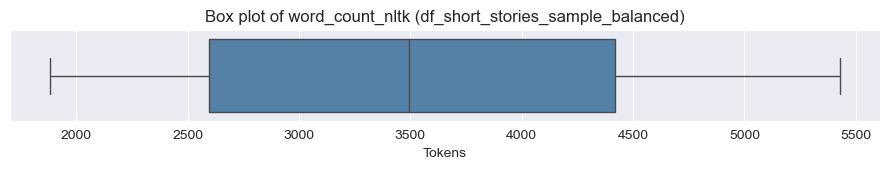

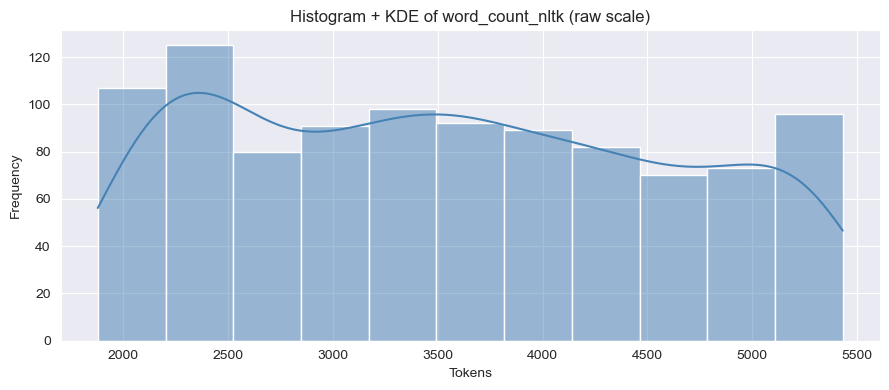

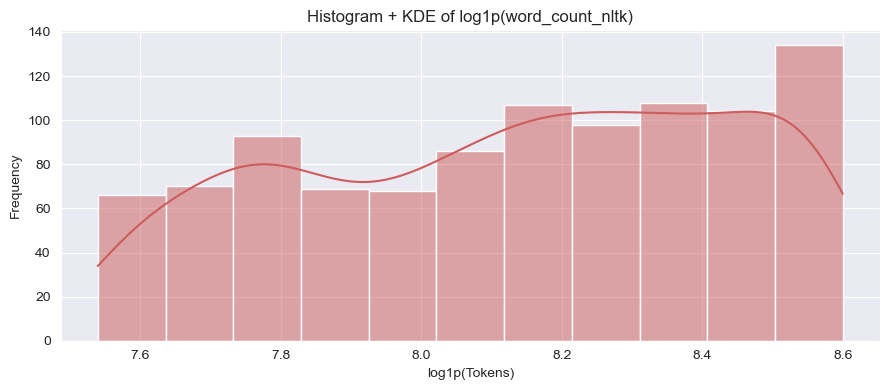

In [22]:
# Select the series
series = df_short_stories_sample_balanced['word_count_nltk'].dropna()

# Summary stats
mean_val = series.mean()
std_val = series.std(ddof=1)  # sample standard deviation
desc = series.describe()  # count, mean, std, min, 25%, 50%, 75%, max

print("Descriptive statistics for word_count_nltk:")
print(f"- Count: {int(desc['count'])}")
print(f"- Mean: {mean_val:.2f}")
print(f"- Std (sample): {std_val:.2f}")
print(f"- Min: {int(desc['min'])}")
print(f"- Q1 (25%): {desc['25%']:.2f}")
print(f"- Median (50%): {desc['50%']:.2f}")
print(f"- Q3 (75%): {desc['75%']:.2f}")
print(f"- Max: {int(desc['max'])}")

# IQR-based outlier detection
q1, q3 = series.quantile([0.25, 0.75])
iqr = q3 - q1
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

outlier_mask = (series < lower_fence) | (series > upper_fence)
outliers = (
    df_short_stories_sample_balanced.loc[outlier_mask, ['author', 'title', 'word_count_nltk']]
    .sort_values('word_count_nltk')
    .reset_index(drop=True)
)

print(f"\nIQR outlier thresholds:")
print(f"- Lower fence: {lower_fence:.2f}")
print(f"- Upper fence: {upper_fence:.2f}")
print(f"Outliers found: {len(outliers)}")
display(outliers.head(10))  # show a preview

# Box plot
plt.figure(figsize=(9, 1.8))
sns.boxplot(x=series, color='steelblue')
plt.title('Box plot of word_count_nltk (df_short_stories_sample_balanced)')
plt.xlabel('Tokens')
plt.tight_layout()

# Saving the plot
plt.savefig(f"{output_directory}/{dataset_filename_3}_boxplot.png", dpi=300)

plt.show()

# Raw scale: Histogram + KDE
plt.figure(figsize=(9, 4))
sns.histplot(series, bins='auto', kde=True, color='steelblue')
plt.title('Histogram + KDE of word_count_nltk (raw scale)')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.tight_layout()

# Saving the plot
plt.savefig(f"{output_directory}/{dataset_filename_3}_histogram.png", dpi=300)

plt.show()

# Log scale via transformation: Histogram + KDE
log_series = np.log1p(series)  # log(1 + x) to handle zeros safely
plt.figure(figsize=(9, 4))
sns.histplot(log_series, bins='auto', kde=True, color='indianred')
plt.title('Histogram + KDE of log1p(word_count_nltk)')
plt.xlabel('log1p(Tokens)')
plt.ylabel('Frequency')
plt.tight_layout()

# Saving the plot
plt.savefig(f"{output_directory}/{dataset_filename_3}_histogram_log_scale.png", dpi=300)

plt.show()